<a href="https://colab.research.google.com/github/Chan0226/Deep-Learning/blob/main/%EC%98%B5%ED%8B%B0%EB%A7%88%EC%9D%B4%EC%A0%B8_%EC%84%B1%EB%8A%A5%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam,RMSprop,Adagrad

In [ ]:
(x_train,y_train),(x_test,y_test) =  fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [ ]:
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

In [ ]:
y_train =tf.keras.utils.to_categorical(y_train,10)
y_test =tf.keras.utils.to_categorical(y_test,10)

In [ ]:
n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

In [ ]:
def build_model(x_train,y_train,x_test=None,y_test=None, opt = 'SGD'):  
  print('2',opt)
  #모델 계층 생성
  model = Sequential()
  model.add(Dense(units=n_hidden1, activation='relu', input_shape = (n_input,)))
  model.add(Dense(units=n_hidden2,activation='relu'))
  model.add(Dense(units=n_hidden3,activation='relu'))
  model.add(Dense(units=n_hidden4,activation='relu'))
  model.add(Dense(units=n_output,activation='softmax'))
  # 학습    
  model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])  

  if x_test is not None and y_test is not None:
    hist = model.fit(x_train,y_train,batch_size=256, epochs=50,validation_data=(x_test,y_test),verbose=2)  
  else:
    hist = model.fit(x_train,y_train,batch_size=256, epochs=50,verbose=2)    
  return model, hist

In [ ]:
#SGD 옵티마이져
sgd_model, sgd_hist = build_model(x_train,y_train,x_test,y_test)
#Adagrad 옵티마이져
adagrad_model, adagrad_hist = build_model(x_train,y_train,x_test,y_test,'Adagrad')
#RMSprop 옵티마이져
rmsprop_model, rmsprop_hist = build_model(x_train,y_train,x_test,y_test,'RMSprop')
#Adam 옵티마이져
adam_model, adam_hist = build_model(x_train,y_train,x_test,y_test,'Adam')





In [ ]:
print("SGD accuracy", sgd_model.evaluate(x_test,y_test,verbose=0)[1])
print("Adagrad accuracy", adagrad_model.evaluate(x_test,y_test,verbose=0)[1])
print("RMSprop accuracy", rmsprop_model.evaluate(x_test,y_test,verbose=0)[1])
print("Adam accuracy", adam_model.evaluate(x_test,y_test,verbose=0)[1])

SGD accuracy 0.8676000237464905
Adagrad accuracy 0.8518999814987183
RMSprop accuracy 0.8736000061035156
Adam accuracy 0.8968999981880188


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
sgd_hist.history

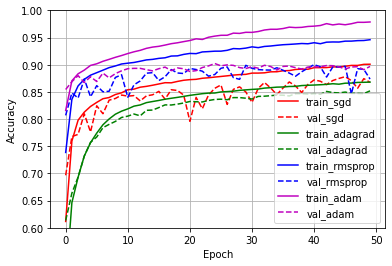

In [ ]:
plt.plot(sgd_hist.history['accuracy'],'r')
plt.plot(sgd_hist.history['val_accuracy'],'r--')

plt.plot(adagrad_hist.history['accuracy'],'g')
plt.plot(adagrad_hist.history['val_accuracy'],'g--')

plt.plot(rmsprop_hist.history['accuracy'],'b')
plt.plot(rmsprop_hist.history['val_accuracy'],'b--')

plt.plot(adam_hist.history['accuracy'],'m')
plt.plot(adam_hist.history['val_accuracy'],'m--')

plt.ylim((0.6,1.0))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend( ['train_sgd','val_sgd','train_adagrad','val_adagrad',
             'train_rmsprop','val_rmsprop','train_adam','val_adam']   , loc='best')
plt.grid()
plt.show()

In [ ]:
# 교차검증
from sklearn.model_selection import KFold
k = 3
def cross_validation(opt='SGD'):
  accuracy = []
  for train_index, val_index in KFold(k).split(x_train):
    xtrain,xval = x_train[train_index], x_train[val_index]
    ytrain,yval = y_train[train_index], y_train[val_index]
    # 인공신경망 학습 및 결과
    print('1',opt)
    model, history = build_model(xtrain,ytrain,opt=opt)
    accuracy.append(model.evaluate(xval,yval,verbose=0)[1])  
  return accuracy    


In [ ]:
# 옵티마이져 4개에 대해서 교차검증을 실행
acc_sgd = cross_validation()


1 SGD
2 SGD
Epoch 1/50
157/157 - 1s - loss: 1.5784 - accuracy: 0.5882 - 1s/epoch - 9ms/step
Epoch 2/50
157/157 - 1s - loss: 0.8467 - accuracy: 0.7219 - 916ms/epoch - 6ms/step
Epoch 3/50
157/157 - 1s - loss: 0.6851 - accuracy: 0.7726 - 918ms/epoch - 6ms/step
Epoch 4/50
157/157 - 1s - loss: 0.6109 - accuracy: 0.7963 - 896ms/epoch - 6ms/step
Epoch 5/50
157/157 - 1s - loss: 0.5701 - accuracy: 0.8084 - 896ms/epoch - 6ms/step
Epoch 6/50
157/157 - 1s - loss: 0.5399 - accuracy: 0.8145 - 885ms/epoch - 6ms/step
Epoch 7/50
157/157 - 1s - loss: 0.5149 - accuracy: 0.8246 - 886ms/epoch - 6ms/step
Epoch 8/50
157/157 - 1s - loss: 0.4985 - accuracy: 0.8283 - 868ms/epoch - 6ms/step
Epoch 9/50
157/157 - 1s - loss: 0.4832 - accuracy: 0.8334 - 894ms/epoch - 6ms/step
Epoch 10/50
157/157 - 1s - loss: 0.4677 - accuracy: 0.8385 - 871ms/epoch - 6ms/step
Epoch 11/50
157/157 - 1s - loss: 0.4672 - accuracy: 0.8371 - 873ms/epoch - 6ms/step
Epoch 12/50
157/157 - 1s - loss: 0.4506 - accuracy: 0.8443 - 877ms/epoch - 6

In [ ]:
acc_adagrad = cross_validation('Adagrad')

1 Adagrad
2 Adagrad
Epoch 1/50
157/157 - 1s - loss: 2.0479 - accuracy: 0.3845 - 1s/epoch - 9ms/step
Epoch 2/50
157/157 - 1s - loss: 1.5342 - accuracy: 0.6289 - 911ms/epoch - 6ms/step
Epoch 3/50
157/157 - 1s - loss: 1.1398 - accuracy: 0.6610 - 902ms/epoch - 6ms/step
Epoch 4/50
157/157 - 1s - loss: 0.9445 - accuracy: 0.6766 - 910ms/epoch - 6ms/step
Epoch 5/50
157/157 - 1s - loss: 0.8443 - accuracy: 0.6996 - 897ms/epoch - 6ms/step
Epoch 6/50
157/157 - 1s - loss: 0.7828 - accuracy: 0.7239 - 881ms/epoch - 6ms/step
Epoch 7/50
157/157 - 1s - loss: 0.7387 - accuracy: 0.7448 - 879ms/epoch - 6ms/step
Epoch 8/50
157/157 - 1s - loss: 0.7039 - accuracy: 0.7635 - 877ms/epoch - 6ms/step
Epoch 9/50
157/157 - 1s - loss: 0.6747 - accuracy: 0.7778 - 882ms/epoch - 6ms/step
Epoch 10/50
157/157 - 1s - loss: 0.6497 - accuracy: 0.7874 - 896ms/epoch - 6ms/step
Epoch 11/50
157/157 - 1s - loss: 0.6279 - accuracy: 0.7950 - 902ms/epoch - 6ms/step
Epoch 12/50
157/157 - 1s - loss: 0.6084 - accuracy: 0.8019 - 886ms/e

ValueError: ignored

In [ ]:
acc_rmsprop = cross_validation('RMSprop')
acc_adam = cross_validation('Adam')

1 RMSprop
2 RMSprop
Epoch 1/50
157/157 - 2s - loss: 0.7967 - accuracy: 0.7052 - 2s/epoch - 13ms/step
Epoch 2/50
157/157 - 1s - loss: 0.4984 - accuracy: 0.8149 - 1s/epoch - 7ms/step
Epoch 3/50
157/157 - 1s - loss: 0.4148 - accuracy: 0.8468 - 1s/epoch - 7ms/step
Epoch 4/50
157/157 - 1s - loss: 0.3851 - accuracy: 0.8591 - 990ms/epoch - 6ms/step
Epoch 5/50
157/157 - 1s - loss: 0.3513 - accuracy: 0.8702 - 989ms/epoch - 6ms/step
Epoch 6/50
157/157 - 1s - loss: 0.3320 - accuracy: 0.8784 - 977ms/epoch - 6ms/step
Epoch 7/50
157/157 - 1s - loss: 0.3117 - accuracy: 0.8860 - 990ms/epoch - 6ms/step
Epoch 8/50
157/157 - 1s - loss: 0.3001 - accuracy: 0.8887 - 963ms/epoch - 6ms/step
Epoch 9/50
157/157 - 1s - loss: 0.2897 - accuracy: 0.8929 - 979ms/epoch - 6ms/step
Epoch 10/50
157/157 - 1s - loss: 0.2784 - accuracy: 0.8978 - 991ms/epoch - 6ms/step
Epoch 11/50
157/157 - 1s - loss: 0.2737 - accuracy: 0.9001 - 978ms/epoch - 6ms/step
Epoch 12/50
157/157 - 1s - loss: 0.2625 - accuracy: 0.9022 - 988ms/epoch 

In [ ]:
#평균 accuracy
print("sgd",np.array(acc_sgd).mean())
print("Adagrad",np.array(acc_adagrad).mean())
print("RMSprop",np.array(acc_rmsprop).mean())
print("Adam",np.array(acc_adam).mean())

sgd 0.8691333333651224
Adagrad 0.8514333168665568
RMSprop 0.8837000131607056
Adam 0.8906500140825907


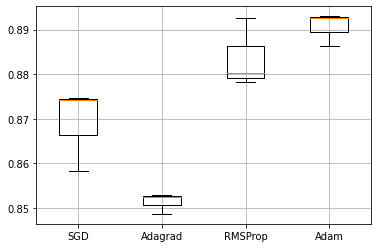

In [ ]:
plt.boxplot([acc_sgd,acc_adagrad,acc_rmsprop,acc_adam], labels=['SGD','Adagrad','RMSProp','Adam'])
plt.grid()
plt.show()

In [ ]:
# 인공신경망에서 옵티마이저는 Adam을 사용한다.  

# 컨볼류션 신경망과 컴퓨터 비전